# Guess Who Assignment
## Noah Choate and Eli Ritchie

### Loading in the necessary packages and data

To being our assignment, we first loaded the necessary libraries for our analysis. We began by importing pandas to be able to manipulate / load the dataset. We then loaded sklearn's train test split in order to efficiently split our dataset into training and testing for our decision tree. We then loaded the Decision Tree classifier in order to produce the decision tree. Next, we loaded in the Label encoder to one-hot encode our data's categories. Lastly, we utilized google colab's import drive and files in order to load in the dataset from Google Drive, and download our decision tree as a PNG.

In [67]:
# Load necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab import drive, files

# Load in the dataset with the help of drive.mount
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/My Drive/ColabNotebooks/DSC3344/Data/GuessWhoFINAL.xlsx")
df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Gender,Age,HairColor,HairLength,FacialHair,EyeColor,Hat,Glasses,SkinTone,Accessories,FaceShape,FaceExpression,NoseSize,Bald
30,Betty,Female,Old,White,Short,No,Blue,No,Yes,Light,Yes,Oval,Smile,Small,No
31,Joe (White),Male,Old,Grey,Short,No,Brown,Yes,No,Light,No,Oval,Neutral,Big,No
32,Frank (Yellow),Male,Young,Black,Short,No,Brown,Yes,No,Medium,No,Round,Neutral,Big,No
33,Charles (Yellow),Male,Old,Grey,Bald,Mustache,Brown,No,Yes,Light,No,Round,Neutral,Big,Yes
34,Paul (Yellow),Male,Old,Grey,Short,Beard,Brown,No,Yes,Light,No,Round,Neutral,Small,Yes


### Encoding

It was necessary to use One-Hot encoding for decision tree due to our categorical dataset. A decision tree may not recognize what the difference is in "Blonde," "Black," or "Brown," so we distinguish the different options in each category by assigning them a number.

In [68]:
# One hot encoding the features
encoder = LabelEncoder()

# Encode every column with the exception of Name
columns_to_encode = [
    'Gender', 'Age', 'HairColor', 'HairLength', 'FacialHair',
    'EyeColor', 'Hat', 'Glasses', 'SkinTone',
    'Accessories', 'FaceShape', 'FaceExpression', 'NoseSize', 'Bald'
]

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [75]:
# Confirm one hot encoded correctly
df.tail()

,Name,Gender,Age,HairColor,HairLength,FacialHair,EyeColor,Hat,Glasses,SkinTone,Accessories,FaceShape,FaceExpression,NoseSize,Bald
30,Betty,0,0,6,3,2,0,0,1,1,1,0,2,1,0
31,Joe (White),1,0,3,3,2,1,1,0,1,0,0,1,0,0
32,Frank (Yellow),1,1,0,3,2,1,1,0,2,0,1,1,0,0
33,Charles (Yellow),1,0,3,0,1,1,0,1,1,0,1,1,0,1
34,Paul (Yellow),1,0,3,3,0,1,0,1,1,0,1,1,1,1


### Decision Tree

We began creating our decision tree by distinguishing what was our target and features. Our target was the name of each character, while the features was essentially everything else.

We then seperated our training and test sets. We set a low test size due to our dataset being so small, only 36 or so unique characters.

Last, we began training the data against itself for our Decision Tree.

In [73]:
# Set features and target for Decision Tree
X = df.drop(columns=['Name'])  # Features (Everything but Name)
y = df['Name']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=1)

# Begin and train the Decision Tree Classifier
DecisionTree = DecisionTreeClassifier(max_depth=100, random_state=1)
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=1)

### Visualize our Decision Tree

We decided to use pydotplus' in order to visualize our tree like exemplified in class. In order to do so, we needed to load in a number of packages necessary for tree visualization. Export_graphviz and StringIO is used in order to convert the decision tree into a readable format. Image from IPython display is necessary to visualize our graph in Google Colab in the notebook file. Pydotplus is used to convert the DOT file from graphviz and StringIO into a visual form.

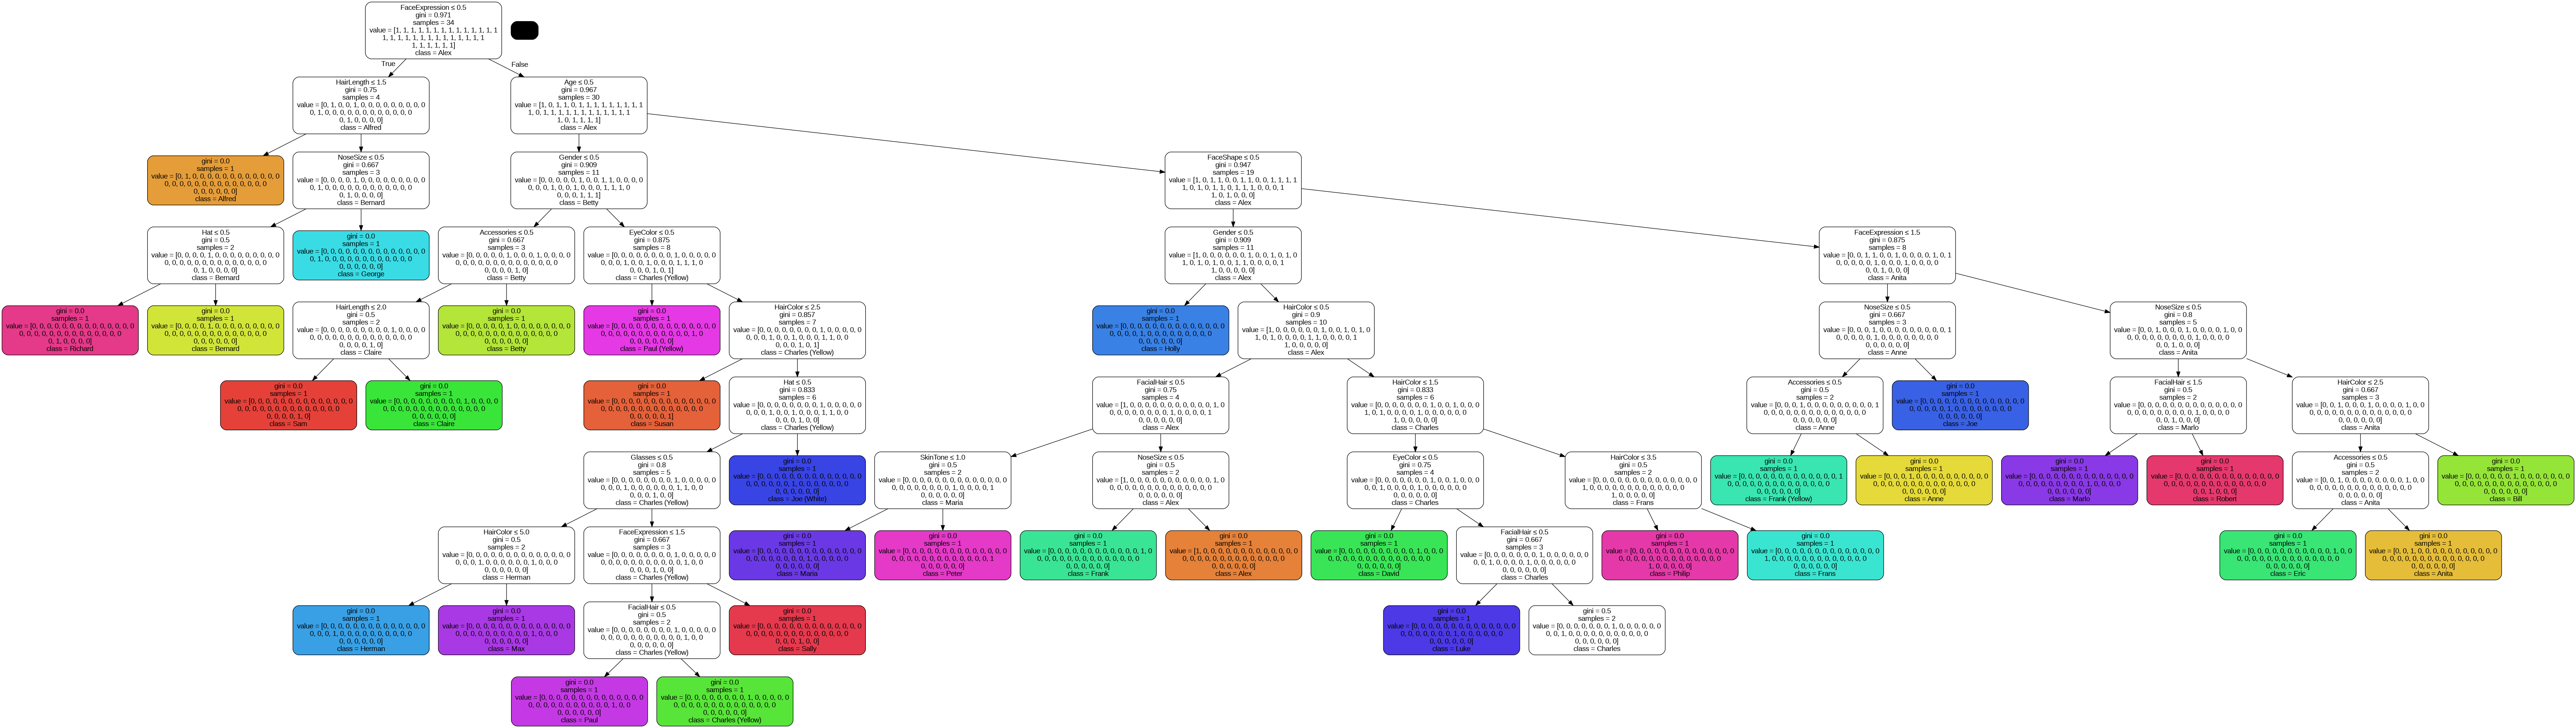

In [74]:
# Visualize Decision Tree

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(DecisionTree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns,
                class_names=np.unique(y))

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('GuessWho.png')
Image(graph.create_png())

# Download Decision Tree to local machine
#files.download('GuessWho.png')

### How to Use

You can traverse this decision tree as each category as a series of numbers assigned to it. For example, in Facial Expression, 1 = Smile, 2 = Neutral and 0 = Frown. When approaching the top right leaf node, the Facial Expression is less than or equal to 0.5, with two branches True or False. If the character is Frowning, then go the "True" route. If not, follow the "False" route.

### Conclusion

A decision tree in this context may be important as you can identify people following the branches of the decision tree just based on their physical characteristics. This may help in areas such as trying to identify missing persons, or even persons of interest on for example an Amber Alert.